In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_mul2.csv"
REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_mul2_new.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_sine_model.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_magic_wand.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_micro_speech.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_toycar.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_toycar_new.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_resnet.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_resnet_new.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_aww.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_aww_new.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_vww.csv"
# REPORT = "/work/git/mlonmcu/mlonmcu/iree_reports/iree31_vww_new.csv"

In [34]:
IGNORE_VMVX = False

In [35]:
df = pd.read_csv(REPORT)
model_names = df["Model"].unique()
assert len(model_names) == 1
model_name = model_names[0]
if "Reason" in df.columns:
    df = df[pd.isna(df["Reason"])]
if "RAM heap" not in df.columns:
    df["RAM heap"] = np.nan
if "RAM stack" not in df.columns:
    df["RAM stack"] = np.nan
if IGNORE_VMVX:
    df = df[~df["Backend"].isin(["ireevmvx", "ireevmvx_inline"])]
#if "RAM zero-init data" not in df:
#    df["RAM zero-init data"] = np.nan
df = df.fillna(0)
df

,Model,Backend,Target,Setup Cycles,Run Cycles,Deinit Cycles,Total Cycles,Total ROM,Total RAM,ROM read-only,ROM code,RAM zero-init data,RAM stack,RAM heap
0,mul2,ireevmvx,etiss,134746,451599,21198,607786,450212,125756,49688,400512,13476,21352,85064
1,mul2,ireevmvx_inline,etiss,46361,396006,19412,462022,420388,46872,43672,376704,13440,10552,18312
2,mul2,ireellvm,etiss,117601,38845,19525,176214,416492,114892,48064,368416,13476,12368,84248
3,mul2,ireellvm_inline,etiss,61536,29175,19981,110935,390804,46088,43848,346944,13444,10572,18336
4,mul2,ireellvmc,etiss,48491,32110,19213,100057,184666,114156,23088,161566,13476,12000,83896
5,mul2,ireellvmc_inline,etiss,30466,24094,19783,74586,155450,45304,20480,134958,13444,9956,18184


## Plots

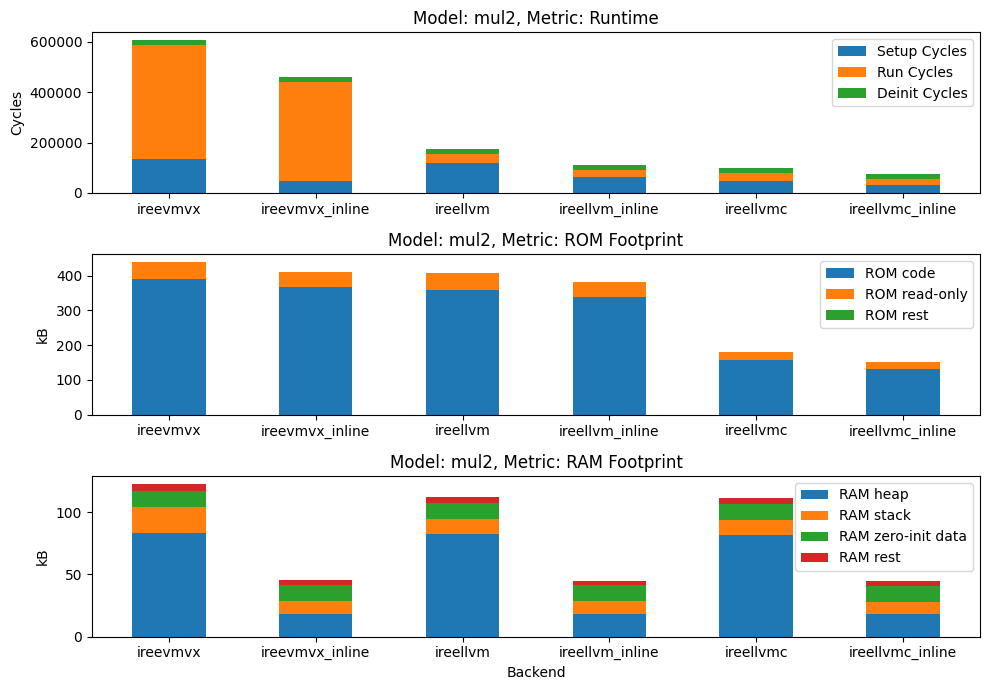

In [36]:

width = 0.5

fig, axs = plt.subplots(3, 1, figsize=(10, 7))

X = df["Backend"].values

# 0: cyclces
data = {
    "Setup Cycles": df["Setup Cycles"].values,
    "Run Cycles": df["Run Cycles"].values,
    "Deinit Cycles": df["Deinit Cycles"].values,
}
# print(data)

ax = axs[0]
bottom = np.zeros(len(X))

for label, data_ in data.items():
    p = ax.bar(X, data_, width, label=label, bottom=bottom)
    bottom += data_

ax.set_title(f"Model: {model_name}, Metric: Runtime")
ax.legend(loc="upper right")
# ax.set_xlabel("Backend")
ax.set_ylabel("Cycles")
# ax.set_yscale("log")

# 1: rom
data = {
    "ROM code": df["ROM code"].values / 1024,
    "ROM read-only": df["ROM read-only"].values / 1024,
    "ROM rest": (df["Total ROM"] - df["ROM code"] - df["ROM read-only"]).values / 1024,
}

ax = axs[1]
bottom = np.zeros(len(X))

for label, data_ in data.items():
    p = ax.bar(X, data_, width, label=label, bottom=bottom)
    bottom += data_

ax.set_title(f"Model: {model_name}, Metric: ROM Footprint")
ax.legend(loc="upper right")
# ax.set_xlabel("Backend")
ax.set_ylabel("kB")

# 2: ram
data = {
    "RAM heap": df["RAM heap"].values / 1024,
    "RAM stack": df["RAM stack"].values / 1024,
    "RAM zero-init data": df["RAM zero-init data"].values / 1024,
    "RAM rest": (df["Total RAM"] - df["RAM heap"] - df["RAM stack"] - df["RAM zero-init data"]).values / 1024,
}

ax = axs[2]
bottom = np.zeros(len(X))

for label, data_ in data.items():
    p = ax.bar(X, data_, width, label=label, bottom=bottom)
    bottom += data_

ax.set_title(f"Model: {model_name}, Metric: RAM Footprint")
ax.legend(loc="upper right")
ax.set_xlabel("Backend")
ax.set_ylabel("kB")
# ax.set_yscale("log")
plt.tight_layout()
plt.show()

pdf_file = REPORT.replace(".csv", ".png")
pdf_file

fig.savefig(pdf_file)